In [10]:
import os
import sys
import nashpy
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [7]:
strategies_A = np.linspace(0, 1, 1000)
strategies_D = np.linspace(0, 1, 1000)

In [9]:
C = 1000
w = 0.02
gm = 0.0002

In [64]:
utility_A = lambda rate, tau, o, g: (rate if round(stats.poisson.cdf(k = tau, mu = 100)) == 1 else 0) - o - g
utility_D = lambda rate, tau, o, g: - (rate if round(stats.poisson.cdf(k = tau, mu = 100)) == 1 else 0) + o + g

utility_A = np.vectorize(utility_A, excluded = {"rate", "o", "g"})
utility_D = np.vectorize(utility_D, excluded = {"rate", "o", "g"})

<AxesSubplot:>

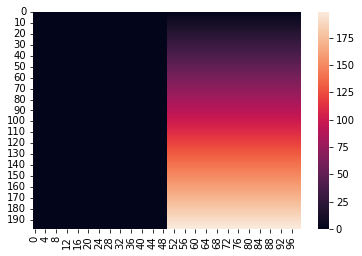

In [87]:
sns.heatmap(np.array([utility_A(r, np.arange(50, 150), w, gm)
                      for r in np.arange(1, 200)]), annot = False)

In [73]:
prova_A = np.array([utility_A(r, np.arange(50, 150), w, gm) for r in np.arange(1, 200)])
prova_D = np.array([utility_D(r, np.arange(50, 150), w, gm) for r in np.arange(1, 200)])

In [78]:
game = nashpy.Game(prova_A, prova_D)

In [86]:
equilibria = []
for eq in game.support_enumeration():
    equilibria += [eq]

KeyboardInterrupt: 